In [12]:
pip install Ipython

Note: you may need to restart the kernel to use updated packages.


In [13]:
import cv2
import ipywidgets as widgets
import IPython.display as display

In [14]:
cam_no = 0 #0번캠 사용
capture = cv2.VideoCapture(cam_no) #비디오 인스턴스 만들어줌
fps = capture.get(cv2.CAP_PROP_FPS)
print('fps: ' + str(fps))

fps: 30.0


In [21]:
# 객체 추적을 하기위해서 roi설정 해줘야한다
# ROI(Region Of Interest) 관심영역
ret, frame = capture.read() # 이미지를 가져옴
img = frame.copy() # 프레임이미지를 img에 복사
height = img.shape[0]
width = img.shape[1]

roi_size = 400
roi_x1 = int(width/2 - roi_size/2) # 좌상단
roi_y1 = int(height/2 - roi_size/2)
roi_x2 = roi_x1 + roi_size
roi_y2 = roi_y1 + roi_size
green = (0, 255, 0)
thick = 15

#초록색 네모박스
cv2.rectangle(img, (roi_x1, roi_y1), (roi_x2, roi_y2), green, thick)

displayBox1 = widgets.Image()
display.display(displayBox1)
displayBox1.value = cv2.imencode(".png", img)[1].tostring()

Image(value=b'')

C:\Users\user\AppData\Local\Temp\ipykernel_9264\2994322608.py:21: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  displayBox1.value = cv2.imencode(".png", img)[1].tostring()


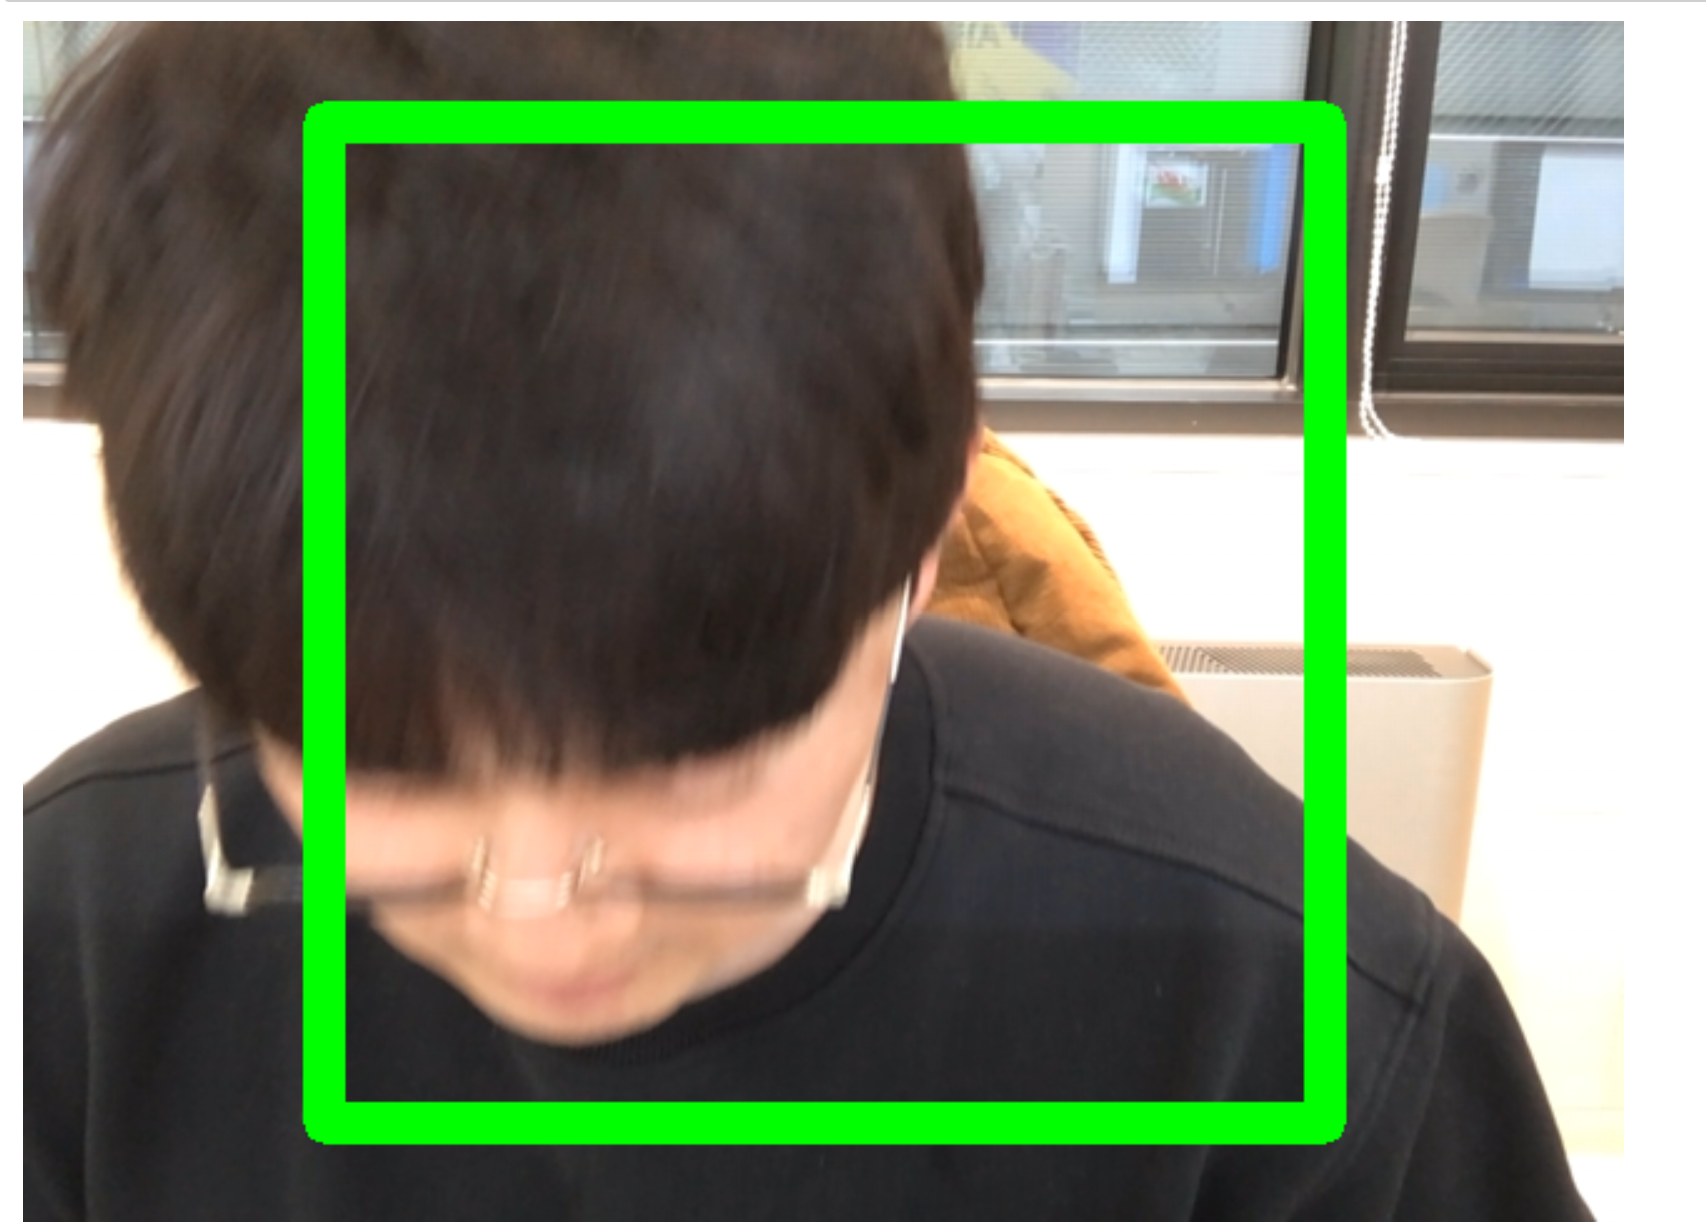

In [22]:
# CSRT라는 트래커를 활용, CSRT가 30fps는 트래킹성능이 비교적 괜찮다
tracker = cv2.TrackerCSRT_create()
roi = (roi_x1, roi_y1, roi_x2-roi_x1, roi_y2-roi_y1)
print('ROI x, y, w, h: ' + str(roi))
tracker.init(frame, roi)
#트래커.init에다가 앞에서 한장찍었던 frame(이미지)과 roi(초록색박스영역)를 넘겨주면된다
# 캡쳐한 이미지에서 초록색영역부분을 roi로 등록 할거다= 그부분을 트래킹 할거다

ROI x, y, w, h: (120, 40, 400, 400)


In [23]:
# 카메라로부터 촬영한 이미지를 출력할 박스를 만들어줌
displayBox3 = widgets.Image()
display.display(displayBox3)

# 무한루프를 돌면서 계속해서 카메라로부터 이미지를 확보
while True:
    ret, frame = capture.read() #캡쳐로부터 계속해서 리드를해서 프레임이라는곳에 담는다
    print(frame)
    #원하는 객체를 잘찾는지 확인
    #프레임에서 찾아낸 객체의 위치가 foundBox에들어간다
    isFound, foundBox = tracker.update(frame)
    if (isFound):
        found_x1 = int(foundBox[0]) #좌상단의x좌표
        found_y1 = int(foundBox[1]) #좌상단의y좌표
        found_x2 = int(foundBox[0] + foundBox[2])#우하단의x좌표
        found_y2 = int(foundBox[1] + foundBox[3])#우하단의y좌표
        
        cv2.rectangle(frame, (found_x1, found_y1), (found_x2, found_y2), green, thick)
        
        displayBox3.value = cv2.imencode(".png", frame)[1].tostring()
       

Image(value=b'')

[[[125 139 136]
  [126 140 137]
  [126 140 137]
  ...
  [113 111 103]
  [116 113 105]
  [115 112 103]]

 [[122 136 132]
  [125 138 134]
  [123 137 132]
  ...
  [108 106  98]
  [108 107  98]
  [109 108  99]]

 [[126 138 134]
  [126 138 134]
  [128 141 135]
  ...
  [114 112 103]
  [114 114 105]
  [114 114 105]]

 ...

 [[ 20  17  19]
  [ 20  17  19]
  [ 20  17  19]
  ...
  [195 231 255]
  [193 229 255]
  [194 230 255]]

 [[ 21  18  20]
  [ 20  17  19]
  [ 20  17  19]
  ...
  [195 231 255]
  [194 230 255]
  [194 230 255]]

 [[ 21  18  20]
  [ 21  18  20]
  [ 20  17  19]
  ...
  [195 231 255]
  [193 229 255]
  [194 230 255]]]
[[[125 139 136]
  [125 139 136]
  [125 139 136]
  ...
  [112 111 104]
  [114 113 106]
  [114 113 106]]

 [[121 136 132]
  [124 138 134]
  [123 137 133]
  ...
  [107 106  99]
  [108 108 100]
  [109 109 101]]

 [[125 139 136]
  [125 138 134]
  [128 140 137]
  ...
  [114 112 104]
  [115 115 106]
  [115 115 106]]

 ...

 [[ 18  16  18]
  [ 20  17  19]
  [ 20  17  19]
  ..

C:\Users\user\AppData\Local\Temp\ipykernel_9264\2256632171.py:20: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  displayBox3.value = cv2.imencode(".png", frame)[1].tostring()


[[[125 139 136]
  [125 139 136]
  [126 140 137]
  ...
  [113 113 103]
  [114 114 105]
  [113 113 103]]

 [[122 137 133]
  [125 139 135]
  [122 137 132]
  ...
  [107 107  97]
  [107 107  97]
  [107 107  97]]

 [[125 139 136]
  [125 139 135]
  [126 141 135]
  ...
  [114 113 103]
  [114 114 103]
  [114 114 103]]

 ...

 [[ 20  17  17]
  [ 20  18  17]
  [ 20  18  16]
  ...
  [196 232 255]
  [194 231 255]
  [194 231 255]]

 [[ 20  17  17]
  [ 20  18  17]
  [ 20  18  16]
  ...
  [195 231 255]
  [194 230 255]
  [194 230 255]]

 [[ 21  18  19]
  [ 21  19  18]
  [ 21  19  17]
  ...
  [195 231 255]
  [193 229 255]
  [193 229 255]]]
[[[128 140 137]
  [126 139 136]
  [126 140 137]
  ...
  [112 111 104]
  [113 112 105]
  [113 112 105]]

 [[123 136 132]
  [125 138 134]
  [123 137 133]
  ...
  [107 106  99]
  [107 106  99]
  [109 109 101]]

 [[127 139 136]
  [127 139 136]
  [128 140 137]
  ...
  [114 112 104]
  [115 115 106]
  [115 115 106]]

 ...

 [[ 18  16  16]
  [ 18  16  15]
  [ 20  18  16]
  ..

[[[127 139 136]
  [126 139 136]
  [126 140 137]
  ...
  [115 111 103]
  [115 112 103]
  [115 112 103]]

 [[123 136 131]
  [125 138 134]
  [123 137 132]
  ...
  [108 106  99]
  [109 108  99]
  [110 109 100]]

 [[127 140 134]
  [127 140 134]
  [128 141 135]
  ...
  [113 112 104]
  [115 115 106]
  [116 116 107]]

 ...

 [[ 20  17  17]
  [ 20  18  17]
  [ 20  18  16]
  ...
  [195 230 255]
  [193 229 255]
  [194 230 255]]

 [[ 20  17  17]
  [ 20  18  17]
  [ 20  18  16]
  ...
  [195 231 255]
  [194 230 255]
  [194 230 255]]

 [[ 20  17  17]
  [ 21  19  18]
  [ 21  19  17]
  ...
  [195 231 255]
  [193 229 255]
  [194 230 255]]]
[[[126 140 137]
  [126 140 137]
  [127 142 138]
  ...
  [113 112 105]
  [113 112 105]
  [112 111 104]]

 [[123 137 132]
  [126 139 135]
  [125 138 134]
  ...
  [107 106  99]
  [108 108 100]
  [108 108 100]]

 [[126 138 133]
  [126 138 133]
  [128 141 135]
  ...
  [112 111 103]
  [114 114 105]
  [114 114 105]]

 ...

 [[ 20  17  17]
  [ 20  18  17]
  [ 20  18  16]
  ..

[[[120 134 133]
  [120 134 133]
  [120 134 133]
  ...
  [107 106  99]
  [107 106  99]
  [108 107 101]]

 [[118 131 128]
  [120 133 131]
  [118 131 128]
  ...
  [103 103  95]
  [103 103  95]
  [105 104  96]]

 [[121 133 130]
  [121 133 130]
  [123 136 132]
  ...
  [108 108 100]
  [110 110 101]
  [110 110 101]]

 ...

 [[ 18  16  16]
  [ 20  18  17]
  [ 20  18  16]
  ...
  [186 222 255]
  [184 221 255]
  [185 222 255]]

 [[ 20  17  17]
  [ 20  18  17]
  [ 20  18  16]
  ...
  [185 221 255]
  [185 222 255]
  [184 221 255]]

 [[ 21  18  19]
  [ 20  18  17]
  [ 20  18  16]
  ...
  [186 222 255]
  [184 221 255]
  [184 221 255]]]


KeyboardInterrupt: 

In [ ]:
capture.release()